# __Imports__

In [0]:
import numpy as np
import tensorflow as tf
import keras

from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input

from IPython.core.display import display

from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input as preprocess_input_vgg19
from keras.applications.vgg19 import decode_predictions as decode_vgg19

# __Constants__

In [0]:
FILE_1 = '/content/01 Umbrella.jpg'
FILE_2 = '/content/02 Couple.jpg'
FILE_3 = '/content/03 Ocean.jpg'

# __Preprocessing Images__

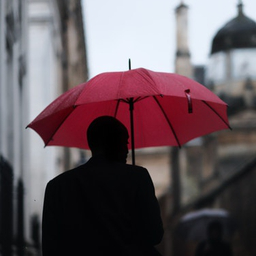

In [0]:
pic = load_img(FILE_1)
display(pic)

In [0]:
pic_array = img_to_array(pic)
pic_array.shape

(256, 256, 3)

In [0]:
expanded = np.expand_dims(pic_array, axis=0)
expanded.shape

(1, 256, 256, 3)

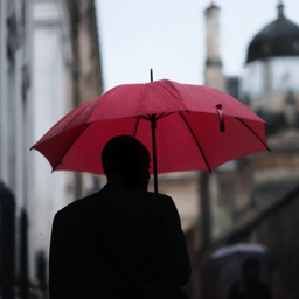

In [0]:
# change the resolution of the picture because ResNet can get only (299, 299) by default
pic = load_img(FILE_1, target_size=(299, 299))
display(pic)

In [0]:
pic_array = img_to_array(pic)
pic_array.shape
expanded = np.expand_dims(pic_array, axis=0)
expanded.shape

(1, 299, 299, 3)

In [0]:
preprocessed = preprocess_input(expanded)

In [0]:
def format_img_inceptionresnet(filename):
  pic = load_img(filename, target_size=(299, 299))
  pic_arr = img_to_array(pic)
  expanded = np.expand_dims(pic_arr, axis=0)
  return preprocess_input(expanded)

In [0]:
def format_img_vgg19(filename):
  pic = load_img(filename, target_size=(224, 224))
  pic_arr = img_to_array(pic)
  expanded = np.expand_dims(pic_arr, axis=0)
  return preprocess_input_vgg19(expanded)

# __Load InceptionResNet__

In [0]:
%%time

inception_model = InceptionResNetV2(weights='imagenet')














225214464/225209952 [==============================] - 4s 0us/step
CPU times: user 30 s, sys: 1.33 s, total: 31.4 s
Wall time: 39 s


In [0]:
inception_model.graph = tf.get_default_graph()

# __Making Predictions__

In [0]:
prediction = inception_model.predict(preprocessed)
decode_predictions(prediction)

[[('n04507155', 'umbrella', 0.82924354),
  ('n03792972', 'mountain_tent', 0.001226827),
  ('n04479046', 'trench_coat', 0.0011062961),
  ('n03788195', 'mosque', 0.001057237),
  ('n03220513', 'dome', 0.0010310997)]]

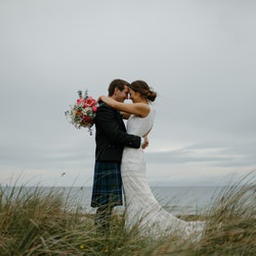

[[('n10148035', 'groom', 0.70423806),
  ('n03450230', 'gown', 0.1166958),
  ('n11879895', 'rapeseed', 0.016582685),
  ('n09421951', 'sandbar', 0.012790663),
  ('n03534580', 'hoopskirt', 0.0072878106)]]

In [0]:
data = format_img_inceptionresnet(FILE_2)
prediction = inception_model.predict(data)
display(load_img(FILE_2))
decode_predictions(prediction)

# __Testing the VGG19 Model__

In [0]:
vgg19_model = VGG19()

574717952/574710816 [==============================] - 6s 0us/step


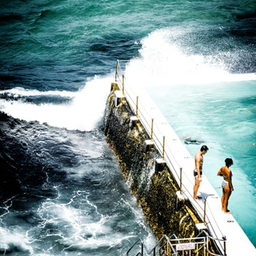

[[('n04347754', 'submarine', 0.16831148),
  ('n02894605', 'breakwater', 0.12554657),
  ('n03662601', 'lifeboat', 0.09670137),
  ('n09399592', 'promontory', 0.08424033),
  ('n02981792', 'catamaran', 0.08419343)]]

In [0]:
data = format_img_vgg19(FILE_3)
pred = vgg19_model.predict(data)
display(load_img(FILE_3))
decode_vgg19(pred)

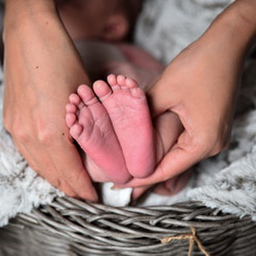

[[('n07880968', 'burrito', 0.3597473),
  ('n01817953', 'African_grey', 0.09527819),
  ('n03992509', "potter's_wheel", 0.047266223),
  ('n07860988', 'dough', 0.03768624),
  ('n01748264', 'Indian_cobra', 0.026607467)]]

In [0]:
# tricky image for the net
data = format_img_vgg19('/content/06 Feet.jpg')
pred = vgg19_model.predict(data)
display(load_img('/content/06 Feet.jpg'))
decode_vgg19(pred)